C:\Users\Erik\AppData\Local\Temp\ipykernel_17852\634215085.py:35: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig.canvas.set_window_title(audio_name)


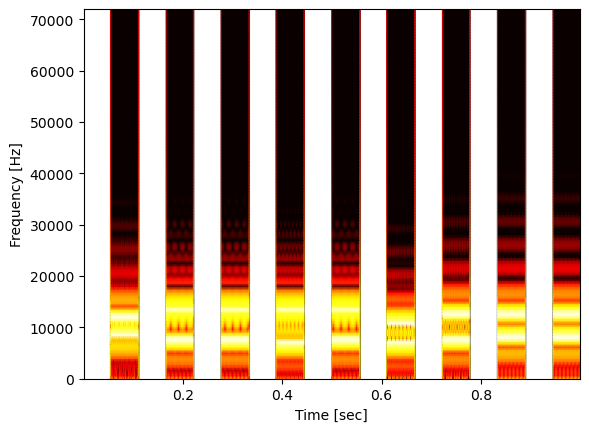

In [8]:
# 1) plot spectrograms of armenian vowels prounounced by you (you can use the code below)
# 2) generate DTMF signal of your phone number using DTMF_Table.png(each digit and pause should be 0.5 seconds)
# 3) get a spectrogram of 2)
import numpy as np
import scipy.io.wavfile as wavfile
import scipy.io
import itertools
import math
import time
import os
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.colors as colors
# from matplotlib.mlab import bivariate_normal
import glob

# ----------------------path manipulate ------------------------------------------

input_dir = 'audios'
file_paths = glob.glob(os.path.join(input_dir, "*.wav"))
short_time = 32 #miliseconds
start_t = 0 # start time in seconds
dur = 7 # duration in seconds
color_theme = 'hot' # inferno, gnuplot2, jet, jet_r, Greys_r, terrain, plasma, gist_gray, gist_gray_r, spectral, bone_r, hot
dpi_value = 96 # dots per inch
size_pixel_y = 1301 
size_pixel_x = 710

# ---------------------------------------------------------------------------------
def get_spectrogram(audio_name, cmapval, start=0,epsilon=1e-4):
    fs, mix_data = wavfile.read(audio_name)

    f, t, Sxx = signal.spectrogram(mix_data[:, 0], fs=fs)
    fig = plt.figure()
    fig.canvas.set_window_title(audio_name)
    plt.pcolormesh(t, f, Sxx, cmap=cmapval, norm=colors.LogNorm(vmin=epsilon, vmax=Sxx.max()), edgecolors='None', shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    fig.set_size_inches(size_pixel_y / dpi_value, size_pixel_x / dpi_value)
    fig.savefig(audio_name + '.png', dpi = dpi_value)
    plt.close()
    return None


def write_audio(path, sr, data):
	# path: the path of output file,
	# sr: sampling rate
	# data: the audio waveform data
	data = data.astype('int16')
	wavfile.write(path, sr, data)
	return None


def gen_sinusoid(freq, duration, sample_rate, amplitude):
	N = duration * sample_rate
	t_samples = np.arange(N)
	omega = 2 * np.pi * freq / sample_rate # angular frequency 
	sinusoid = amplitude * np.sin(omega * t_samples) # sinusoidal signal
	return sinusoid

def gen_item_signal(freqs):
    s1 = gen_sinusoid(freqs[0], 0.5, sr, 5000)
    s2 = gen_sinusoid(freqs[1], 0.5, sr, 5000)
    s = s1 + s2

    return s
	
i = 0

get_spectrogram('a.wav', color_theme)
get_spectrogram('e.wav', color_theme)
get_spectrogram('y.wav', color_theme)
get_spectrogram('i.wav', color_theme)
get_spectrogram('u.wav', color_theme)


freq_table = {
	'1':[1110, 800],
	'2':[1200, 800],
	'3':[1500, 800],
	'4':[1200, 850],
	'5':[1400, 850],
	'6':[1500, 850],
	'7':[1000, 900],
	'8':[1250, 900],
	'9':[1400, 900],
	'*':[1265, 950],
	'0':[1348, 950],
	'#':[1499, 950],
}

numbers = '066362599'
sr = 16000
delay = np.zeros(sr//2)
s = np.array([])
for d in numbers:
	s_ = gen_item_signal(freq_table[d])
	s = np.concatenate((s, delay, s_))

write_audio('my_phone_DTMF.wav', sr, s)
f, t, Sxx = signal.spectrogram(s, fs=len(s))
fig = plt.figure()
plt.pcolormesh(t, f, Sxx, cmap=color_theme, norm=colors.LogNorm(vmin=1e-4, vmax=Sxx.max()), edgecolors='None', shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()